# Masked Face Detector
---
Masked and partially or fully unmasked face detector with application of:
* **pretrained PyTorch model** for face detection
* **Haar Cascade Classifiers** for eyes, mouths and noses detection
* **HOG Facial Landmarks** for jawline detection (lower border of face)
* **Human Skin Detector** for estimation of masked face percentage

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from src.face_detector import inference
from src.haar_detector import detect_face_parts
from src.facial_landmarks_detector import detect_facial_landmarks, get_face_above_jaw
from src.human_skin_detector import detect_skin
from src.perc_calculation import calculate_masking_percentage, draw_roi

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'MainModel.KitModel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by access

In [2]:
def show_images(images, titles, suptitle='Images'):
    assert (len(images) == len(titles)), 'Lists of images and titles of images must have the same length!'
    
    fig, ax = plt.subplots(1, len(images), figsize=(15, 5))
    
    for i, (image, title) in enumerate(zip(images, titles)):
        ax[i].imshow(image)
        ax[i].set_title(title)
        ax[i].axis('off')
    
    fig.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

In [ ]:
import torch
from detecto.core import Model
from detecto import utils, visualize

model = Model()

image = utils.read_image(r'src/FaceMaskDataset/train/1_Handshaking_Handshaking_1_420.jpg')  # Helper function to read in images

labels, boxes, scores = model.predict(image)

persons = [(label, box, score) for label, box, score in zip(labels, boxes, scores) if label == 'person' and score >= 0.7]
persons_object = zip(*persons)
[labels, boxes, scores] = list(persons_object)
boxes = torch.stack(boxes)
print(labels, boxes, scores)

visualize.show_labeled_image(image, boxes, labels)

## Face detector
---
PyTorch pretrained face detection model.

In [3]:
image_unmasked = Image.open('images/faces1.png')
unmasked_faces_info, unmasked_faces_image = inference(image_unmasked)

image_masked = Image.open('images/masked2.png')
masked_faces_info, masked_faces_image = inference(image_masked)

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


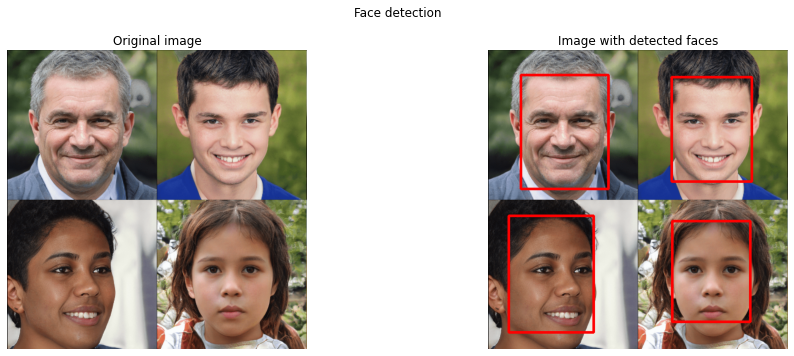

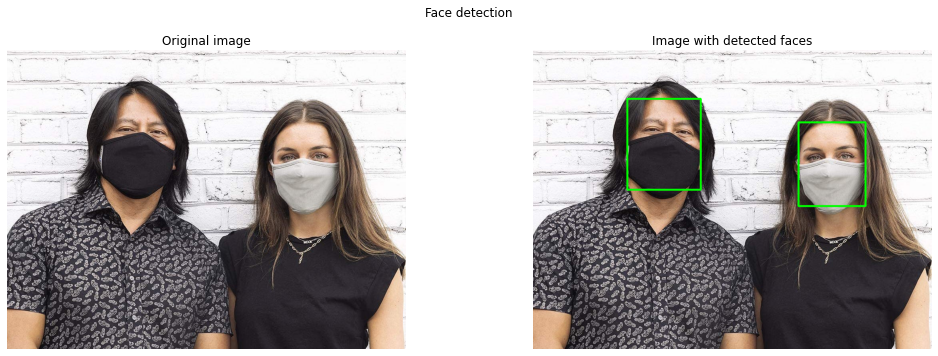

In [4]:
show_images([image_unmasked, unmasked_faces_image],
            ['Original image', 'Image with detected faces'], suptitle='Face detection')

show_images([image_masked, masked_faces_image],
            ['Original image', 'Image with detected faces'], suptitle='Face detection')

In [5]:
unmasked_faces_info, masked_faces_info

([[1, 0.9999998807907104, 349, 324, 497, 515],
  [1, 0.9999983310699463, 62, 47, 228, 263],
  [1, 0.9999549388885498, 348, 51, 500, 249],
  [1, 0.9996711015701294, 39, 314, 200, 535]],
 [[0, 0.9996902942657471, 665, 181, 833, 391],
  [0, 0.9979462027549744, 236, 122, 420, 350]])

In [6]:
face_unmasked = image_unmasked.crop(tuple(unmasked_faces_info[0][2:]))

face_masked = image_masked.crop(tuple(masked_faces_info[1][2:]))

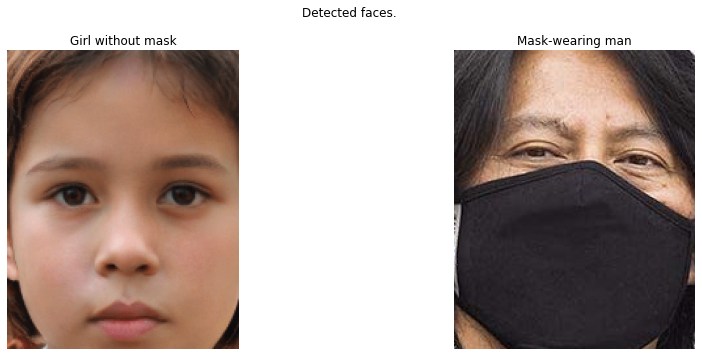

In [7]:
show_images([face_unmasked, face_masked], ['Girl without mask', 'Mask-wearing man'],
            suptitle='Detected faces.')

## Haar Cascade Classifiers

In [8]:
face_unmasked_parts_info, face_unmasked_parts = detect_face_parts(face_unmasked)

face_masked_parts_info, face_masked_parts = detect_face_parts(face_masked)

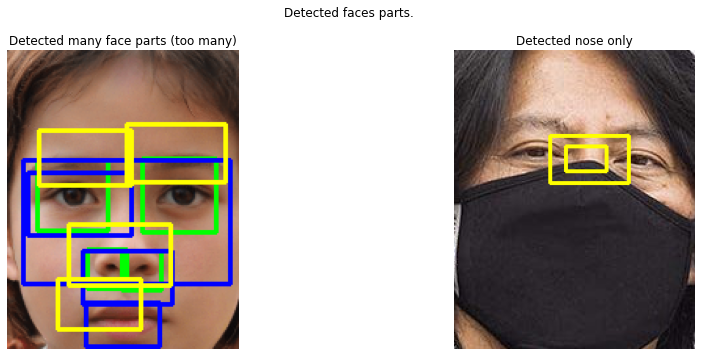

In [9]:
show_images([face_unmasked_parts, face_masked_parts], ['Detected many face parts (too many)', 'Detected nose only'], suptitle='Detected faces parts.')

In [10]:
face_unmasked_parts_info, face_masked_parts_info

({'eyes': [((51, 127), (76, 152)),
   ((73, 128), (98, 153)),
   ((86, 69), (133, 116)),
   ((19, 70), (64, 115))],
  'mouths': [((50, 161), (97, 189)),
   ((48, 128), (105, 162)),
   ((13, 78), (79, 118)),
   ((10, 70), (142, 149))],
  'noses': [((32, 146), (85, 178)),
   ((39, 111), (104, 150)),
   ((20, 51), (79, 86)),
   ((76, 47), (139, 84))]},
 {'eyes': [],
  'mouths': [],
  'noses': [((85, 73), (116, 92)), ((73, 65), (133, 101))]})

In [11]:
def extract_haar_cascade_features():
    # which values of detected regions are to pass on neural network
    pass

## HOG Facial Landmarks

In [12]:
face_unmasked_landmarks_info, face_unmasked_landmarks = detect_facial_landmarks(face_unmasked)

face_masked_landmarks_info, face_masked_landmarks = detect_facial_landmarks(face_masked)

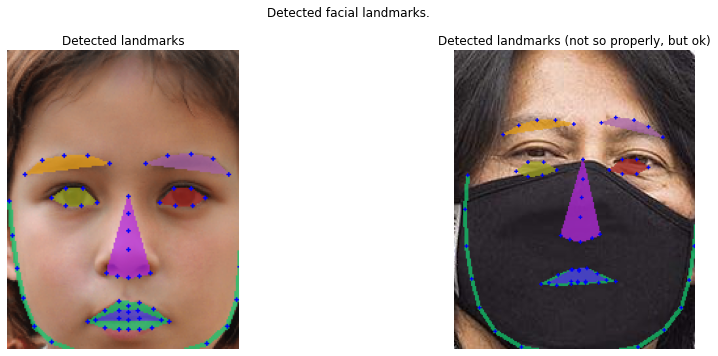

In [13]:
show_images([face_unmasked_landmarks, face_masked_landmarks],
            ['Detected landmarks', 'Detected landmarks (not so properly, but ok)'], suptitle='Detected facial landmarks.')

In [14]:
face_unmasked_landmarks_info['jaw'], face_masked_landmarks_info['jaw']

([(1, 96),
  (3, 118),
  (6, 139),
  (10, 158),
  (17, 176),
  (28, 186),
  (44, 192),
  (61, 194),
  (77, 194),
  (93, 194),
  (111, 192),
  (127, 187),
  (140, 176),
  (146, 159),
  (148, 138),
  (149, 117),
  (149, 95)],
 [(10, 95),
  (8, 121),
  (9, 149),
  (13, 174),
  (19, 196),
  (31, 214),
  (51, 226),
  (72, 230),
  (94, 233),
  (118, 230),
  (140, 226),
  (160, 213),
  (173, 196),
  (179, 175),
  (183, 149),
  (185, 127),
  (186, 102)])

In [15]:
face_unmasked_restr_roi, face_unmasked_restr_mask, face_unmasked_restr_face = get_face_above_jaw(
    face_unmasked, face_unmasked_landmarks_info['jaw'], draw_roi=True)

face_masked_restr_roi, face_masked_restr_mask, face_masked_restr_face = get_face_above_jaw(
    face_masked, face_masked_landmarks_info['jaw'], draw_roi=True)

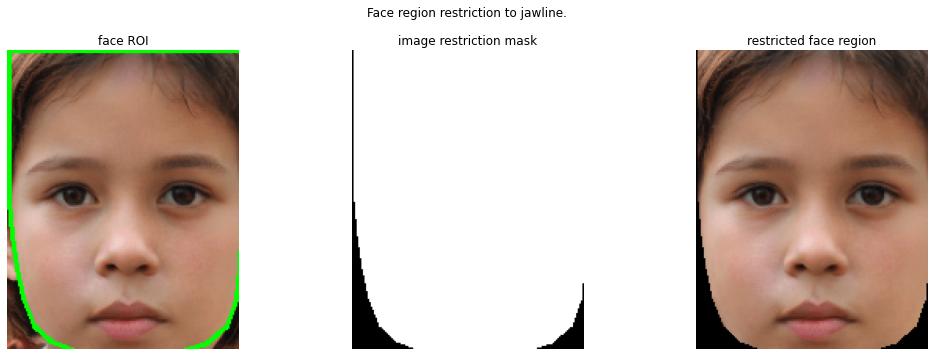

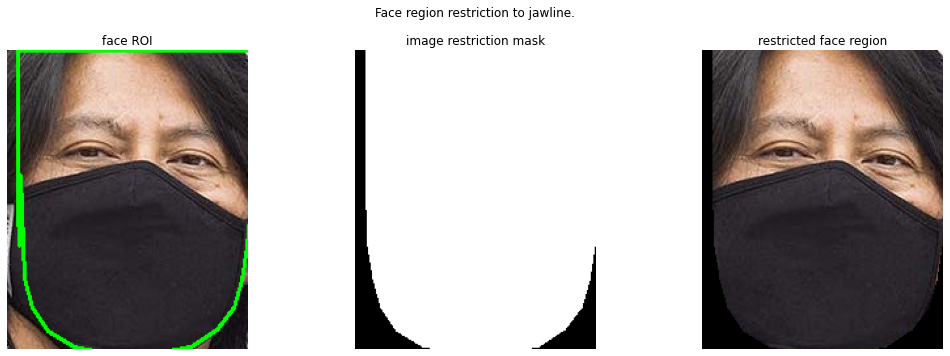

In [16]:
show_images([face_unmasked_restr_roi, face_unmasked_restr_mask, face_unmasked_restr_face],
            ['face ROI', 'image restriction mask', 'restricted face region'],
            suptitle='Face region restriction to jawline.')

show_images([face_masked_restr_roi, face_masked_restr_mask, face_masked_restr_face],
            ['face ROI', 'image restriction mask', 'restricted face region'],
            suptitle='Face region restriction to jawline.')

In [17]:
def extract_hog_landmarks_features():
    # which values of hog facial landmarks are to pass on neural network
    pass

## Human Skin Detection

In [18]:
_, face_unmasked_skin_mask, face_unmasked_skin = detect_skin(face_unmasked)

_, face_masked_skin_mask, face_masked_skin = detect_skin(face_masked)

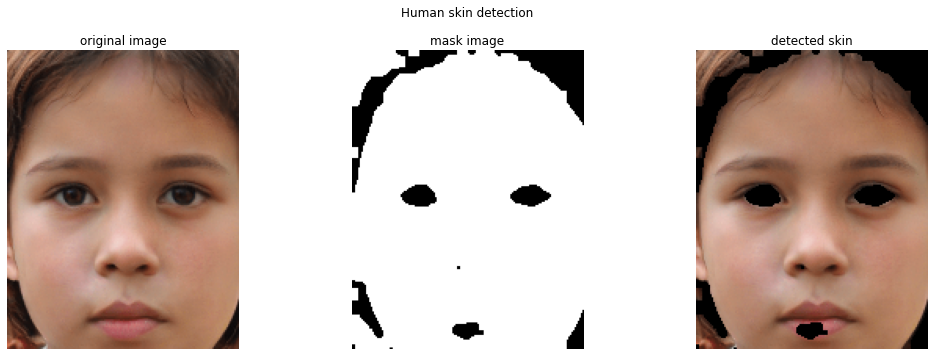

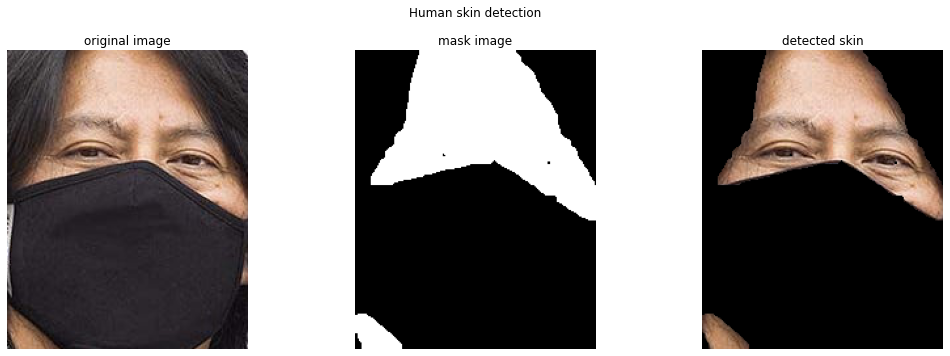

In [19]:
show_images([face_unmasked, face_unmasked_skin_mask, face_unmasked_skin],
            ['original image', 'mask image', 'detected skin'], suptitle='Human skin detection')

show_images([face_masked, face_masked_skin_mask, face_masked_skin],
            ['original image', 'mask image', 'detected skin'], suptitle='Human skin detection')

## Percentage of face masking calculation
---
In order to calculate the percentage of face masking it is necessary to:
1. Take the Haar Cascade detected face parts (true and false detections), which rectangles contain at least 80% of skin detected by Human Skin Detector.
2. Make areas marked by above regions white.
3. Perform bitwise "and" operation on masks for restricted face and detected skin.

Finish.

In [20]:
face_unmasked_perc, face_unmasked_final_mask, face_unmasked_final = calculate_masking_percentage(
    face_unmasked, face_unmasked_skin_mask, face_unmasked_restr_mask, face_unmasked_parts_info)

face_masked_perc, face_masked_final_mask, face_masked_final = calculate_masking_percentage(
    face_masked, face_masked_skin_mask, face_masked_restr_mask, face_masked_parts_info)

In [21]:
face_unmasked_perc, face_masked_perc

(0.07397627106036375, 0.6832321001288423)

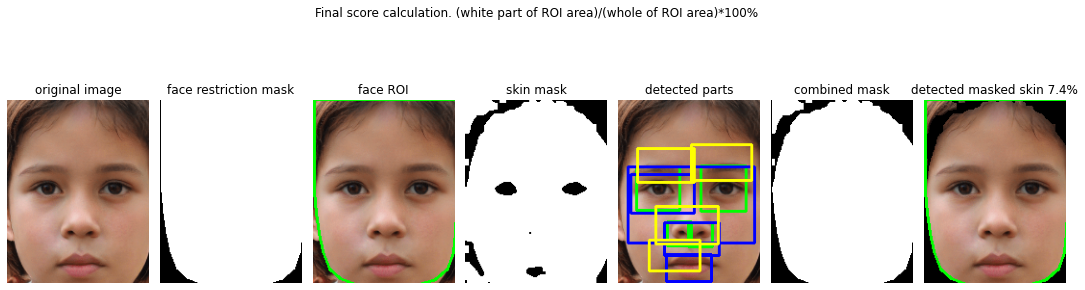

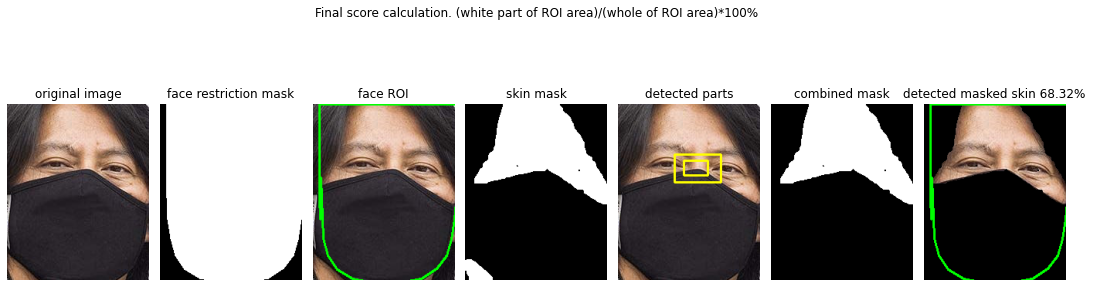

In [22]:
show_images([face_unmasked, face_unmasked_restr_mask, face_unmasked_restr_roi, face_unmasked_skin_mask,
             face_unmasked_parts, face_unmasked_final_mask,
             draw_roi(face_unmasked_final, face_unmasked_landmarks_info['jaw'])],
            ['original image', 'face restriction mask', 'face ROI', 'skin mask', 'detected parts',
             'combined mask', f'detected masked skin {str(np.round(face_unmasked_perc*100, 2))}%'],
            suptitle='Final score calculation. (white part of ROI area)/(whole of ROI area)*100%')

show_images([face_masked, face_masked_restr_mask, face_masked_restr_roi, face_masked_skin_mask,
             face_masked_parts, face_masked_final_mask,
             draw_roi(face_masked_final, face_masked_landmarks_info['jaw'])],
            ['original image', 'face restriction mask', 'face ROI', 'skin mask', 'detected parts',
             'combined mask', f'detected masked skin {str(np.round(face_masked_perc*100, 2))}%'],
            suptitle='Final score calculation. (white part of ROI area)/(whole of ROI area)*100%')

In [23]:
def extract_percentage_features():
    # pass masked and unmasked percentage on neural network
    pass